In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def looser_method(wave, c):
    new_wave = wave - 0.5 * c * (np.roll(wave, - 1) - np.roll(wave, 1))
    return new_wave

def lax_method(wave, c):
    temp_wave = 0.5 * (np.roll(wave, -1) + np.roll(wave, 1))
    return looser_method(temp_wave, c)

def upwind_method(wave, c):
    new_wave = wave - c * (wave - np.roll(wave, 1))
    return new_wave

def lax_wendroff_method(wave, c):
    new_wave = 0.5 * c * (1 + c) * np.roll(wave, 1) + (1 - c**2) * wave - 0.5 * c * (1 - c) * np.roll(wave, - 1)
    return new_wave


def plot(wave, method, c=0.5, iterations=1000):
    plt.plot(wave)

    for i in range(iterations):
        wave = method(wave, c)
        if((i % (iterations / 50)) == 0):
            plt.plot(wave)

    plt.title(f"{method.__name__} with {iterations} iterations")
    plt.show()
    plt.close()


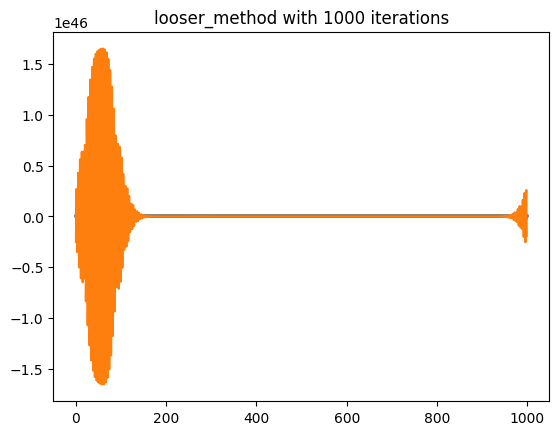

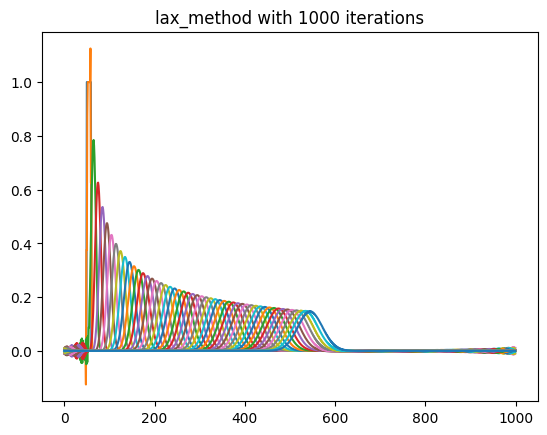

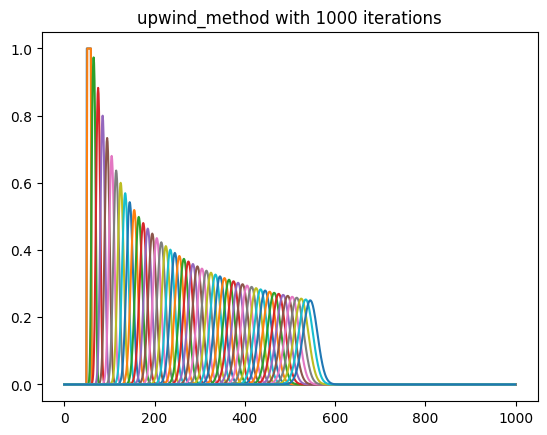

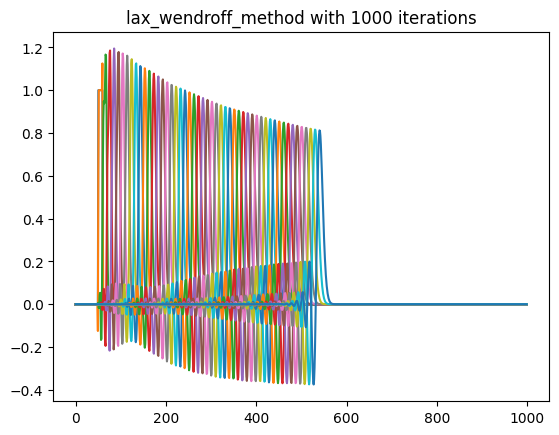

In [53]:
""" Setup of the wave i am going to use """
wave = np.zeros(1000)
wave[50:60] = 1
plt.plot(wave)


plot(wave, looser_method)
plot(wave, lax_method)
plot(wave, upwind_method)
plot(wave, lax_wendroff_method)